In [157]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup, Comment
import time
import sys
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from io import StringIO
import io
import copy

import numpy as np
import matplotlib.pyplot as plt

In [158]:
all_coaches_data = pd.read_csv('all_coaches_data.csv', encoding="utf-8-sig")
all_player_award_data = pd.read_csv('all_player_award_data.csv', encoding="utf-8-sig")
all_player_defense_data = pd.read_csv('all_player_defense_data.csv ', encoding="utf-8-sig")
all_player_kicking_data = pd.read_csv('all_player_kicking_data.csv', encoding="utf-8-sig")

all_player_passing_data = pd.read_csv('all_player_passing_data.csv', encoding="utf-8-sig")
all_player_receiving_data = pd.read_csv('all_player_receiving_data.csv', encoding="utf-8-sig")
all_player_rushing_data = pd.read_csv('all_player_rushing_data.csv', encoding="utf-8-sig")
all_team_advance_data = pd.read_csv('all_team_advance_data.csv', encoding="utf-8-sig")
all_team_defense_data = pd.read_csv('all_team_defense_data.csv', encoding="utf-8-sig")

all_team_games_data = pd.read_csv('all_team_games_data.csv', encoding="utf-8-sig")
all_team_index_custom = pd.read_csv('all_team_index_custom.csv', encoding="utf-8-sig")

all_team_offense_data = pd.read_csv('all_team_offense_data.csv', encoding="utf-8-sig")
all_team_passing_offense_data = pd.read_csv('all_team_passing_offense_data.csv', encoding="utf-8-sig")
all_team_pso_data = pd.read_csv('all_team_pso_data.csv', encoding="utf-8-sig")

In [159]:
dataframes = [
    all_coaches_data, all_player_award_data, all_player_defense_data, all_player_kicking_data,
    all_player_passing_data, all_player_receiving_data, all_player_rushing_data, all_team_advance_data,
    all_team_defense_data, all_team_games_data, all_team_offense_data,
    all_team_passing_offense_data, all_team_pso_data
]

for df in dataframes:
    #Drop all rows where 'season' is equal to 2025
    df.drop(df[df['season'] == 2024].index, inplace=True)


In [160]:
# Define the list of seasons for each condition
seasons_colts = [1983, 1982, 1981, 1980]
seasons_cardinals = [1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980]

dataframes = [
    all_coaches_data, all_player_award_data, all_player_defense_data, all_player_kicking_data,
    all_player_passing_data, all_player_receiving_data, all_player_rushing_data, all_team_advance_data,
    all_team_defense_data, all_team_games_data, all_team_offense_data,
    all_team_passing_offense_data, all_team_pso_data
]

# Iterate through each DataFrame in the list
for df in dataframes:
    # Check for 'Team' column for Baltimore condition
    if 'Team' in df.columns:
        # Replace 'Baltimore Ravens' with 'Baltimore Colts' for specified seasons
        df.loc[df['season'].isin(seasons_colts) & (df['Team'] == 'Baltimore Ravens'), 'Team'] = 'Baltimore Colts'
        # Replace 'Phoenix Cardinals' with 'St. Louis Cardinals' for specified seasons
        df.loc[df['season'].isin(seasons_cardinals) & (df['Team'] == 'Phoenix Cardinals'), 'Team'] = 'St. Louis Cardinals'
    
    # Check for 'Tm' column as an alternative
    elif 'Tm' in df.columns:
        # Replace 'BAL' with 'BAC' for specified seasons
        df.loc[df['season'].isin(seasons_colts) & (df['Tm'] == 'BAL'), 'Tm'] = 'BAC'
        # Replace 'STL' with 'STC' for specified seasons
        df.loc[df['season'].isin(seasons_cardinals) & (df['Tm'] == 'STL'), 'Tm'] = 'STC'

In [161]:
# Filter the DataFrame on both 'season' and 'Team' columns
filtered_data = all_player_passing_data[
    (all_player_passing_data['season'].isin(seasons_cardinals)) & 
    (all_player_passing_data['Tm'] == 'STC')
]

# Display the filtered data
filtered_data

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,season
3706,1,Neil Lomax,STC,28,QB,12,12,6/6/2000,275,463,...,88.5,NaN,48.0,350.0,9.39,5.94,5.83,2.0,2.0,1987
3774,69,Shawn Halloran,STC,23,QB,3,2,1/1/2000,18,42,...,54.0,NaN,5.0,34.0,10.64,4.87,3.91,0.0,0.0,1987
3781,75,Sammy Garza,STC,22,QB,2,1,0-1-0,11,20,...,63.1,NaN,1.0,13.0,4.76,8.10,4.76,0.0,0.0,1987
3817,111,Stump Mitchell,STC,28,RB,12,12,NaN,1,3,...,53.5,NaN,0.0,0.0,0.00,5.67,5.67,0.0,0.0,1987
3852,146,Cliff Stoudt,STC,32,QB,12,0,NaN,0,1,...,39.6,NaN,0.0,0.0,0.00,0.00,0.00,0.0,0.0,1987
3871,16,Neil Lomax,STC,27,QB,14,14,4/9/2001,240,421,...,73.6,NaN,52.0,381.0,10.99,4.66,4.06,1.0,0.0,1986
3899,44,Cliff Stoudt,STC,31,QB,5,2,0-2-0,52,91,...,53.5,NaN,7.0,43.0,7.14,5.09,2.49,1.0,1.0,1986
3935,80,Stump Mitchell,STC,27,RB,15,13,NaN,1,3,...,90.3,NaN,0.0,0.0,0.00,5.00,11.67,0.0,0.0,1986
3949,92,Evan Arapostathis,STC,23,P,5,0,NaN,0,1,...,39.6,NaN,0.0,0.0,0.00,0.00,0.00,0.0,0.0,1986
3977,11,Neil Lomax,STC,26,QB,16,16,5/11/2000,265,471,...,79.5,NaN,61.0,442.0,11.47,5.21,4.87,1.0,1.0,1985


In [162]:
# Filter the DataFrame on both 'season' and 'Team' columns
filtered_data = all_player_passing_data[
    (all_player_passing_data['season'].isin(seasons_cardinals)) & 
    (all_player_passing_data['Tm'] == 'PHO')
]

# Display the filtered data
filtered_data

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,season


In [163]:

# List of DataFrames -ja
dataframes = [
    all_player_award_data,
    all_player_defense_data,
    all_player_kicking_data,
    all_player_passing_data,
    all_player_receiving_data,
    all_player_rushing_data
]

for df in dataframes:
    # Create the new 'Player' column with the condition -ja
    df['Player'] = df.apply(lambda row: f"QB {row['Player']}" if row['Pos'] == "QB" else row['Player'], axis=1)
    
# List of DataFrames -ja
dataframes = [
    all_player_award_data,
    all_player_defense_data,
    all_player_kicking_data,
    all_player_passing_data,
    all_player_receiving_data,
    all_player_rushing_data
]

# Fill NaN values with 0 in each DataFrame -ja
for df in dataframes:
    df.fillna(0, inplace=True)

### Merging/vlookup data | giving every df the team_id column

In [164]:
# List of DataFrames to clean -ja
dataframes = {
    "all_team_pso_data": all_team_pso_data,
    "all_team_passing_offense_data": all_team_passing_offense_data,
    "all_team_offense_data": all_team_offense_data,
    "all_team_defense_data": all_team_defense_data,
    "all_team_advance_data": all_team_advance_data
}

# Cleaning and processing each DataFrame -ja
for name, df in dataframes.items():
    # Drop rows where 'Team' is "0", blank, or NaN -ja
    df = df[~df['Team'].isin(['0', '', None])]
    df = df.dropna(subset=['Team'])

    # Merge 'team_id' from 'all_team_index_custom' based on 'Team' -ja
    df = df.merge(all_team_index_custom[['Team', 'team_id']], on='Team', how='left')

    # Ensure 'team_id' is rounded to the nearest whole number -ja
    df['team_id'] = np.round(df['team_id']).astype('Int64')

    # Drop duplicates based on 'season' and 'team_id' -ja
    df = df.drop_duplicates(subset=['season', 'team_id'])

    # Update the DataFrame in the dictionary -ja
    dataframes[name] = df

# Unpack the cleaned DataFrames -ja
all_team_pso_data = dataframes["all_team_pso_data"]
all_team_passing_offense_data = dataframes["all_team_passing_offense_data"]
all_team_offense_data = dataframes["all_team_offense_data"]
all_team_defense_data = dataframes["all_team_defense_data"]
all_team_advance_data = dataframes["all_team_advance_data"]

# Create a dictionary mapping 'Team' to 'team_id' from 'all_team_index_custom' -ja
team_id_lookup = all_team_index_custom.set_index('Team')['team_id'].to_dict()

# Use the map function to return 'team_id' into 'all_player_award_data' -ja
all_player_award_data['team_id'] = all_player_award_data['Team'].map(team_id_lookup)

# The 'team_id' column is now added to 'all_player_award_data' -ja
# Ensure 'team_id' is rounded to the nearest whole number -ja
all_player_award_data['team_id'] = np.round(all_player_award_data['team_id']).astype('Int64')

 
# Create a dictionary mapping 'team_abb' to 'team_id' from 'all_team_index_custom' -ja
team_id_lookup = all_team_index_custom.set_index('team_abb')['team_id'].to_dict()

# List of DataFrames to update -ja
dataframes = {
    "all_player_defense_data": all_player_defense_data,
    "all_player_kicking_data": all_player_kicking_data,
    "all_player_passing_data": all_player_passing_data,
    "all_player_receiving_data": all_player_receiving_data,
    "all_player_rushing_data": all_player_rushing_data,
    "all_coaches_data": all_coaches_data,

}

# Apply the VLOOKUP-like function and round the 'team_id' in each DataFrame -ja
for name, df in dataframes.items():
    # Use the map function to return 'team_id' using 'Tm' as the key -ja
    df['team_id'] = df['Tm'].map(team_id_lookup)

    # Ensure 'team_id' is rounded to the nearest whole number -ja
    df['team_id'] = np.round(df['team_id']).astype('Int64')

    # Update the DataFrame in the dictionary -ja
    dataframes[name] = df

# Unpack the cleaned DataFrames -ja
all_player_defense_data = dataframes["all_player_defense_data"]
all_player_kicking_data = dataframes["all_player_kicking_data"]
all_player_passing_data = dataframes["all_player_passing_data"]
all_player_receiving_data = dataframes["all_player_receiving_data"]
all_player_rushing_data = dataframes["all_player_rushing_data"]
all_coaches_data = dataframes["all_coaches_data"]

#now every df has 'team_id' relationship -ja

### Merging/vlookup data | team_offense, team_defense, team_passing_offense, team_pso INTO team_advance

In [165]:
#dfs have id relation to team, remember trades cannot be taken in account -ja


# Merge columns from 'all_team_offense_data' into 'all_team_advance_data' -ja
all_team_advance_data = all_team_advance_data.merge(
    all_team_offense_data[
        ['team_id', 'season', 'team_offense_G', 'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 
         'team_offense_Tot Yds & TO_Y/P', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 
         'team_offense_Tot Yds & TO_Cmp', 'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 
         'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 'team_offense_Passing_1stD', 'team_offense_Passing_Att', 
         'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD', 
         'team_offense_Penalties_Pen', 'team_offense_Penalties_Yds', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 
         'team_offense_TO%', 'team_offense_EXP']
    ], 
    on=['team_id', 'season'], 
    how='left'
)
# Drop duplicates after merge- ja
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['season', 'team_id'])

# Merge columns from 'all_team_defense_data' into 'all_team_advance_data'
all_team_advance_data = all_team_advance_data.merge(
    all_team_defense_data[
        ['team_id', 'season', 'team_defense_G', 'team_defense_PA', 'team_defense_Tot Yds & TO_Yds', 'team_defense_Tot Yds & TO_Ply', 
         'team_defense_Tot Yds & TO_Y/P', 'team_defense_Tot Yds & TO_TO', 'team_defense_Tot Yds & TO_FL', 'team_defense_Tot Yds & TO_1stD', 
         'team_defense_Tot Yds & TO_Cmp', 'team_defense_Tot Yds & TO_Att', 'team_defense_Passing_Yds', 'team_defense_Passing_TD', 
         'team_defense_Passing_Int', 'team_defense_Passing_NY/A', 'team_defense_Passing_1stD', 'team_defense_Passing_Att', 
         'team_defense_Rushing_Yds', 'team_defense_Rushing_TD', 'team_defense_Rushing_Y/A', 'team_defense_Rushing_1stD', 
         'team_defense_Penalties_Pen', 'team_defense_Penalties_Yds', 'team_defense_Penalties_1stPy', 'team_defense_Sc%', 
         'team_defense_TO%', 'team_defense_EXP']
    ], 
    on=['team_id', 'season'], 
    how='left'
)
# Drop duplicates after merge -ja
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['season', 'team_id'])

# Merge columns from 'all_team_passing_offense_data' into 'all_team_advance_data' -ja
all_team_advance_data = all_team_advance_data.merge(
    all_team_passing_offense_data[
        ['team_id', 'season', 'passing_offense_G', 'passing_offense_Cmp', 'passing_offense_Att', 'passing_offense_Cmp%', 
         'passing_offense_Yds', 'passing_offense_TD', 'passing_offense_TD%', 'passing_offense_Int', 'passing_offense_Int%', 
         'passing_offense_Lng', 'passing_offense_Y/A', 'passing_offense_AY/A', 'passing_offense_Y/C', 'passing_offense_Y/G', 
         'passing_offense_Rate', 'passing_offense_Sk', 'passing_offense_Yds.1', 'passing_offense_Sk%', 'passing_offense_NY/A', 
         'passing_offense_ANY/A', 'passing_offense_4QC', 'passing_offense_GWD', 'passing_offense_EXP']
    ], 
    on=['team_id', 'season'], 
    how='left'
)
# Drop duplicates after merge -ja
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['season', 'team_id'])

# Merge 'pso' column from 'all_team_pso_data' into 'all_team_advance_data' -ja
all_team_advance_data = all_team_advance_data.merge(
    all_team_pso_data[['team_id', 'season', 'pso']], 
    on=['team_id', 'season'], 
    how='left'
)
# Drop duplicates after merge -ja
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['season', 'team_id'])

# Create the 'champion' column in the all_team_advance_data DataFrame -ja
all_team_advance_data['champion'] = (all_team_advance_data['champion_share'] == 1).astype(int)

# The 'champion' column will now have a value of 1 where 'champion_share' equals 1 -ja
# Drop the specified columns from 'all_team_advance_data' -ja
columns_to_drop = ['T', 'passing_offense_Yds.1', 'team_offense_G', 'team_defense_G']
all_team_advance_data = all_team_advance_data.drop(columns=columns_to_drop)

all_team_advance_data

,season,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,...,passing_offense_Rate,passing_offense_Sk,passing_offense_Sk%,passing_offense_NY/A,passing_offense_ANY/A,passing_offense_4QC,passing_offense_GWD,passing_offense_EXP,pso,champion
0,2023,Baltimore Ravens,13,4,0.765,483,280,203,11.9,1.2,...,102.5,41,7.7,6.8,7.2,1.0,0.0,90.07,1800,0
1,2023,San Francisco 49ers,12,5,0.706,491,298,193,11.4,0.4,...,110.2,34,6.5,8.4,8.6,0.0,0.0,198.19,1000,0
2,2023,Dallas Cowboys,12,5,0.706,509,315,194,11.4,-2.2,...,104.6,40,6.1,6.7,7.1,2.0,3.0,173.42,1400,0
3,2023,Detroit Lions,12,5,0.706,461,395,66,3.9,0.4,...,98.1,31,4.9,6.9,7.0,2.0,3.0,134.35,2200,0
4,2023,Buffalo Bills,11,6,0.647,451,311,140,8.2,-1.8,...,92.2,24,4.0,6.9,6.5,2.0,4.0,119.09,900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1980,Tampa Bay Buccaneers,5,10,0.344,271,341,-70,-4.4,-0.7,...,68.4,24,4.3,5.8,5.2,5.0,4.0,NaN,2500,0
1333,1980,Green Bay Packers,5,10,0.344,231,371,-140,-8.8,-0.3,...,65.1,43,7.8,5.9,4.1,0.0,3.0,NaN,100000,0
1334,1980,St. Louis Cardinals,5,11,0.313,299,350,-51,-3.2,0.8,...,61.7,50,9.6,5.1,3.7,0.0,0.0,NaN,5000,0
1335,1980,New York Giants,4,12,0.250,249,425,-176,-11.0,1.3,...,57.6,47,8.4,4.7,3.3,2.0,2.0,NaN,50000,0


### Player Database

In [166]:

# Add the 'type' column to each DataFrame -ja
all_player_defense_data['type'] = 'defense'
all_player_passing_data['type'] = 'passing'
all_player_rushing_data['type'] = 'rushing'
all_player_kicking_data['type'] = 'kicking'
all_player_receiving_data['type'] = 'receiving'

# Select the relevant columns from each DataFrame -ja
defense_data = all_player_defense_data[['season', 'Player', 'Tm', 'Pos', 'team_id']]
passing_data = all_player_passing_data[['season', 'Player', 'Tm', 'Pos', 'team_id']]
rushing_data = all_player_rushing_data[['season', 'Player', 'Tm', 'Pos', 'team_id']]
kicking_data = all_player_kicking_data[['season', 'Player', 'Tm', 'Pos', 'team_id']]
receiving_data = all_player_receiving_data[['season', 'Player', 'Tm', 'Pos', 'team_id']]

# Concatenate the DataFrames together -ja
combined_data = pd.concat([defense_data, passing_data, rushing_data, kicking_data, receiving_data], ignore_index=True)

# Display the combined DataFrame -ja
combined_data = combined_data.fillna(0)
combined_data = combined_data.drop_duplicates(subset=['Player', 'season'])

# Merge the specified columns from all_team_advance_data into combined_data -ja
combined_data = combined_data.merge(
    all_team_advance_data[['team_id', 'season', 'playoff_games', 'champion', 'champion_share']],
    on=['team_id', 'season'],
    how='left'
)

all_player_award_data = all_player_award_data.groupby(['Player', 'season'], as_index=False).sum()
all_player_award_data = all_player_award_data.sort_values(by='season', ascending=False)

In [167]:
# Sort the DataFrame back by 'season' in descending order -ja
combined_data = combined_data.fillna(0)
combined_data = combined_data.sort_values(by='season', ascending=False)

# Merge the specified columns from all_team_advance_data into combined_data -ja
combined_data = combined_data.merge(
    all_player_award_data[['Player', 'season', 'mvp_shares', 'dpoy_shares', 'opoy_shares', 'all_pro', 'cpoy_shares']],
    on=['Player', 'season'],
    how='left'
)

# Fill NaN values with 0 -ja
combined_data = combined_data.fillna(0)

# Sort the DataFrame back by 'season' in descending order -ja
combined_data = combined_data.sort_values(by='season', ascending=False)

combined_data = combined_data.drop_duplicates(subset=['Player', 'season'])

combined_data

,season,Player,Tm,Pos,team_id,playoff_games,champion,champion_share,mvp_shares,dpoy_shares,opoy_shares,all_pro,cpoy_shares
0,2023,Foyesade Oluokun,JAX,LB,8,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1143,2023,Quincy Williams,NYJ,LB,10,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0
1141,2023,Bobby Okereke,NYG,LB,21,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1140,2023,T.J. Edwards,CHI,LB,32,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1139,2023,Jessie Bates III,ATL,S,29,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61831,1980,Conway Hayman,HOU,T,16,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
61832,1980,Gary Anderson,WAS,G,24,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
61833,1980,Steve Henry,NYG,DB,21,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
61834,1980,Linden King,SDG,LB,5,3.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0


In [168]:
# List of columns to create cumulative sums for -ja
columns_to_cumsum = [
    ('mvp_shares', 'sum_mvp_shares'),
    ('dpoy_shares', 'sum_dpoy_shares'),
    ('opoy_shares', 'sum_opoy_shares'),
    ('all_pro', 'sum_all_pro'),
    ('cpoy_shares', 'sum_cpoy_shares'),
    ('champion_share', 'sum_champion_shares'),
    ('champion', 'sum_champions'),
    ('playoff_games', 'sum_playoff_games')
]

# Sort the DataFrame by 'Player' and 'season' in ascending order -ja
combined_data = combined_data.sort_values(by=['Player', 'season'])

# Calculate the cumulative sums and shift by one position -ja
for col, new_col in columns_to_cumsum:
    combined_data[new_col] = combined_data.groupby('Player')[col].cumsum().shift(1).fillna(0)

# Adjust for every player's first season in the league -ja
for col, new_col in columns_to_cumsum:
    # Find the first season for each player -ja
    first_season_players = combined_data.groupby('Player').head(1)
    
    # Set the cumulative sum to 0 for the first season -ja
    combined_data.loc[first_season_players.index, new_col] = 0

# Sort the DataFrame back by 'season' in descending order -ja
combined_data = combined_data.sort_values(by='season', ascending=False)

# Function to calculate the rolling sum for the last N seasons excluding the current season -ja
def calculate_rolling_sum(df, column, new_column, window):
    rolling_sums = df.groupby('Player')[column].apply(lambda x: x.shift(1).rolling(window=window, min_periods=1).sum())
    df[new_column] = rolling_sums.reset_index(level=0, drop=True)
    df[new_column] = df[new_column].fillna(0)
    return df

# Sort the DataFrame by 'Player' and 'season' in ascending order -ja
combined_data = combined_data.sort_values(by=['Player', 'season'])

# Calculate the rolling sums -ja
combined_data = calculate_rolling_sum(combined_data, 'mvp_shares', 'sum_mvp_shares_L4S', 4)
combined_data = calculate_rolling_sum(combined_data, 'dpoy_shares', 'sum_dpoy_shares_L4S', 4)

combined_data = calculate_rolling_sum(combined_data, 'champion_share', 'sum_player_L1S_cs', 1)
combined_data = calculate_rolling_sum(combined_data, 'champion_share', 'sum_player_L3S_cs', 3)
combined_data = calculate_rolling_sum(combined_data, 'champion_share', 'sum_player_L5S_cs', 5)
combined_data = calculate_rolling_sum(combined_data, 'champion_share', 'sum_player_L8S_cs', 8)
                                              
# Sort the DataFrame back by 'season' in descending order -ja
combined_data = combined_data.sort_values(by='season', ascending=False)

In [169]:
filtered_data = combined_data[combined_data['Player'] == 'QB C.J. Stroud'][['season', 'Player', 'Pos', 'playoff_games', 'sum_playoff_games']]
filtered_data

,season,Player,Pos,playoff_games,sum_playoff_games
726,2023,QB C.J. Stroud,QB,2.0,0.0


In [170]:
filtered_data = combined_data[combined_data['Player'] == 'QB Josh Allen'][['season', 'Player', 'Tm','Pos', 'sum_playoff_games', 'sum_mvp_shares', 'playoff_games']]
filtered_data

,season,Player,Tm,Pos,sum_playoff_games,sum_mvp_shares,playoff_games
20,2023,QB Josh Allen,BUF,QB,8.0,0.382,2.0
3012,2022,QB Josh Allen,BUF,QB,6.0,0.080,2.0
5003,2021,QB Josh Allen,BUF,QB,4.0,0.080,2.0
6207,2020,QB Josh Allen,BUF,QB,1.0,0.000,3.0
8412,2019,QB Josh Allen,BUF,QB,0.0,0.000,1.0
9781,2018,QB Josh Allen,BUF,QB,0.0,0.000,0.0


In [171]:
filtered_data = combined_data[combined_data['Player'] == 'Josh Allen'][['season', 'Player', 'Tm','Pos', 'sum_playoff_games', 'sum_dpoy_shares', 'playoff_games']]
filtered_data

,season,Player,Tm,Pos,sum_playoff_games,sum_dpoy_shares,playoff_games
1193,2023,Josh Allen,JAX,OLB,2.0,0.0,0.0
2868,2022,Josh Allen,JAX,OLB,0.0,0.0,2.0
4609,2021,Josh Allen,JAX,LOLB,0.0,0.0,0.0
6093,2020,Josh Allen,JAX,LDE,0.0,0.0,0.0
7855,2019,Josh Allen,JAX,LB,0.0,0.0,0.0
16154,2014,Josh Allen,TAM,C,0.0,0.0,0.0


In [172]:
filtered_data = combined_data[combined_data['Player'] == 'QB Lamar Jackson'][['season', 'Player', 'Tm','Pos', 'sum_playoff_games', 'sum_mvp_shares', 'playoff_games', 'mvp_shares']]
filtered_data

,season,Player,Tm,Pos,sum_playoff_games,sum_mvp_shares,playoff_games,mvp_shares
194,2023,QB Lamar Jackson,BAL,QB,6.0,1.0,3.0,0.986
2068,2022,QB Lamar Jackson,BAL,QB,5.0,1.0,1.0,0.000
3608,2021,QB Lamar Jackson,BAL,QB,5.0,1.0,0.0,0.000
6298,2020,QB Lamar Jackson,BAL,QB,3.0,1.0,2.0,0.000
7475,2019,QB Lamar Jackson,BAL,QB,1.0,0.0,2.0,1.000
9514,2018,QB Lamar Jackson,BAL,QB,0.0,0.0,1.0,0.000


In [173]:
filtered_data = combined_data[combined_data['Player'] == 'QB Jordan Love'][['season', 'Player', 'Tm','Pos', 'sum_playoff_games', 'sum_mvp_shares', 'playoff_games', 'mvp_shares']]
filtered_data

,season,Player,Tm,Pos,sum_playoff_games,sum_mvp_shares,playoff_games,mvp_shares
113,2023,QB Jordan Love,GNB,QB,2.0,0.0,2.0,0.0
2401,2022,QB Jordan Love,GNB,QB,2.0,0.0,0.0,0.0
3541,2021,QB Jordan Love,GNB,QB,0.0,0.0,2.0,0.0


In [174]:
filtered_data = combined_data[combined_data['Player'] == 'Justin Tucker'][['season', 'Player', 'Tm','Pos', 'all_pro', 'sum_all_pro']]
filtered_data

,season,Player,Tm,Pos,all_pro,sum_all_pro
507,2023,Justin Tucker,BAL,K,1.0,8.0
1787,2022,Justin Tucker,BAL,K,1.0,7.0
3908,2021,Justin Tucker,BAL,K,1.0,6.0
6205,2020,Justin Tucker,BAL,K,1.0,5.0
7279,2019,Justin Tucker,BAL,K,1.0,4.0
9070,2018,Justin Tucker,BAL,K,1.0,3.0
12059,2017,Justin Tucker,BAL,K,1.0,2.0
12500,2016,Justin Tucker,BAL,K,1.0,1.0
14815,2015,Justin Tucker,BAL,K,0.0,1.0
16622,2014,Justin Tucker,BAL,K,0.0,1.0


In [175]:
print(list(combined_data))

['season', 'Player', 'Tm', 'Pos', 'team_id', 'playoff_games', 'champion', 'champion_share', 'mvp_shares', 'dpoy_shares', 'opoy_shares', 'all_pro', 'cpoy_shares', 'sum_mvp_shares', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_all_pro', 'sum_cpoy_shares', 'sum_champion_shares', 'sum_champions', 'sum_playoff_games', 'sum_mvp_shares_L4S', 'sum_dpoy_shares_L4S', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs']


### Kicker Database

In [176]:
all_player_kicking_data = all_player_kicking_data.fillna(0)
all_player_kicking_data = all_player_kicking_data.drop_duplicates(subset=['Player', 'season'])

# Create the 'FGM_40_50+' column by adding '40-49_FGM' and '50+_FGM' and dividing by the sum of '40-49_FGA' and '50+_FGA' -ja
all_player_kicking_data['40_50+_perc_x_makes'] = ((all_player_kicking_data['40-49_FGM'] + all_player_kicking_data['50+_FGM']) / 
                                                  (all_player_kicking_data['40-49_FGA'] + all_player_kicking_data['50+_FGA'])) * (all_player_kicking_data['40-49_FGM'] + all_player_kicking_data['50+_FGM'])

# Merge the specified columns from all_team_advance_data into combined_data v
all_player_kicking_data = all_player_kicking_data.merge(
    combined_data[['Player', 'season', 'champion', 'champion_share', 'mvp_shares', 'all_pro', 'cpoy_shares', 'sum_cpoy_shares', 'sum_mvp_shares', 'sum_all_pro','sum_champion_shares', 'sum_champions', 'sum_playoff_games', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs']],
    on=['Player', 'season'],
    how='left'
)

# Fill NaN values with 0 -ja
all_player_kicking_data = all_player_kicking_data.fillna(0)

# Drop duplicate rows based on 'Player' and 'season' -ja
all_player_kicking_data = all_player_kicking_data.drop_duplicates(subset=['Player', 'season'])

# Sort the DataFrame by 'Player' and 'season' in descending order -ja
all_player_kicking_data = all_player_kicking_data.sort_values(by=['Player', 'season'], ascending=[True, False])

# Filter the DataFrame for rows where 'Pos' is 'K' -ja
all_player_kicking_data = all_player_kicking_data[all_player_kicking_data['Pos'] == 'K']

all_player_kicking_data

,Rk,Player,Tm,Age,Pos,G,GS,0-19_FGA,0-19_FGM,20-29_FGA,...,sum_cpoy_shares,sum_mvp_shares,sum_all_pro,sum_champion_shares,sum_champions,sum_playoff_games,sum_player_L1S_cs,sum_player_L3S_cs,sum_player_L5S_cs,sum_player_L8S_cs
1094,39,Aaron Elling,BAL,27,K,9,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
1153,39,Aaron Elling,2TM,26,K,8,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
1193,21,Aaron Elling,MIN,25,K,16,0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
814,40,Aaron Pettrey,CIN,24,K,2,0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
287,27,Adam Vinatieri,IND,47,K,12,0,0.0,0.0,7.0,...,0.0,0.0,3.0,7.25,4.0,41.0,0.25,0.25,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,27,Zane Gonzalez,CAR,26,K,12,0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
215,26,Zane Gonzalez,ARI,25,K,12,0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
264,4,Zane Gonzalez,ARI,24,K,16,0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
356,33,Zane Gonzalez,2TM,23,K,7,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0


In [177]:
print(list(all_player_kicking_data))

['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', '0-19_FGA', '0-19_FGM', '20-29_FGA', '20-29_FGM', '30-39_FGA', '30-39_FGM', '40-49_FGA', '40-49_FGM', '50+_FGA', '50+_FGM', 'Scoring_FGA', 'Scoring_FGM', 'Scoring_Lng', 'Scoring_FG%', 'Scoring_XPA', 'Scoring_XPM', 'Scoring_XP%', 'Kickoffs_KO', 'Kickoffs_KOYds', 'Kickoffs_TB', 'Kickoffs_TB%', 'Kickoffs_KOAvg', 'season', 'team_id', 'type', '40_50+_perc_x_makes', 'champion', 'champion_share', 'mvp_shares', 'all_pro', 'cpoy_shares', 'sum_cpoy_shares', 'sum_mvp_shares', 'sum_all_pro', 'sum_champion_shares', 'sum_champions', 'sum_playoff_games', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs']


In [178]:
# Filter the DataFrame to include only rows where 'Coach' is 'Pete Carroll' -ja
tuck = all_player_kicking_data[all_player_kicking_data['Player'] == 'Justin Tucker']

# Select the specified columns -ja
tuck = tuck[['Player', 'season', 'Tm', 'team_id', 'champion', 'champion_share', 'sum_champion_shares', 'sum_champions', 'sum_all_pro', 'all_pro']]

# Display the resulting DataFrame -ja
tuck

,Player,season,Tm,team_id,champion,champion_share,sum_champion_shares,sum_champions,sum_all_pro,all_pro
5,Justin Tucker,2023,BAL,4,0.0,0.50,1.75,1.0,8.0,1.0
60,Justin Tucker,2022,BAL,4,0.0,0.00,1.75,1.0,7.0,1.0
130,Justin Tucker,2021,BAL,4,0.0,0.00,1.75,1.0,6.0,1.0
204,Justin Tucker,2020,BAL,4,0.0,0.25,1.50,1.0,5.0,1.0
276,Justin Tucker,2019,BAL,4,0.0,0.25,1.25,1.0,4.0,1.0
325,Justin Tucker,2018,BAL,4,0.0,0.00,1.25,1.0,3.0,1.0
389,Justin Tucker,2017,BAL,4,0.0,0.00,1.25,1.0,2.0,1.0
445,Justin Tucker,2016,BAL,4,0.0,0.00,1.25,1.0,1.0,1.0
497,Justin Tucker,2015,BAL,4,0.0,0.00,1.25,1.0,1.0,0.0
562,Justin Tucker,2014,BAL,4,0.0,0.25,1.00,1.0,1.0,0.0


### QB Database

In [179]:
# Filter the DataFrame to include only rows where 'type' is 'passing' -ja
passing_data = combined_data[combined_data['Pos'] == 'QB']

# Merge the 'Age' column from 'all_player_passing_data' into 'passing_data' -ja
passing_data = passing_data.merge(
    all_player_passing_data[['Player', 'season', 'G', 'GS','Age', 'QBR', 'TD', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD']],
    on=['Player', 'season'],
    how='left'
)

# Merge the 'SRS' column from 'all_team_advance_data' into 'passing_data' -ja
passing_data = passing_data.merge(
    all_team_advance_data[['team_id', 'season', 'SRS', 'W-L%', 'MoV', 'SoS']],
    on=['team_id', 'season'],
    how='left'
)

passing_data = passing_data.drop_duplicates(subset=['Player', 'season'])

In [180]:
# Filter for 'Patrick Mahomes' to see the result -ja
patrick_mahomes_data = passing_data[passing_data['Player'] == 'QB Patrick Mahomes']

# Display the filtered DataFrame -ja
patrick_mahomes_data

,season,Player,Tm,Pos,team_id,playoff_games,champion,champion_share,mvp_shares,dpoy_shares,...,Sk,Sk%,NY/A,ANY/A,4QC,GWD,SRS,W-L%,MoV,SoS
3,2023,QB Patrick Mahomes,KAN,QB,1,4.0,1.0,1.00,0.024,0.0,...,27.0,4.3,6.41,6.26,1.0,2.0,3.7,0.647000,4.5,-0.8
149,2022,QB Patrick Mahomes,KAN,QB,1,4.0,1.0,1.00,0.980,0.0,...,26.0,3.9,7.51,7.93,4.0,4.0,6.2,0.823529,7.5,-1.2
197,2021,QB Patrick Mahomes,KAN,QB,1,3.0,0.0,0.50,0.000,0.0,...,28.0,4.1,6.84,7.07,3.0,3.0,7.4,0.705882,6.8,0.6
280,2020,QB Patrick Mahomes,KAN,QB,1,4.0,0.0,0.75,0.040,0.0,...,22.0,3.6,7.53,8.33,3.0,3.0,6.8,0.875000,6.9,-0.1
377,2019,QB Patrick Mahomes,KAN,QB,1,4.0,1.0,1.00,0.000,0.0,...,17.0,3.4,7.79,8.38,1.0,1.0,9.1,0.750000,8.9,0.2
423,2018,QB Patrick Mahomes,KAN,QB,1,3.0,0.0,0.50,0.820,0.0,...,26.0,4.3,8.13,8.89,2.0,2.0,8.9,0.750000,9.0,-0.1
500,2017,QB Patrick Mahomes,KAN,QB,1,1.0,0.0,0.00,0.000,0.0,...,2.0,5.4,7.27,6.05,0.0,1.0,3.4,0.625000,4.8,-1.3


### Coach Database

In [181]:
# Merge the specified columns from all_team_advance_data into combined_data -ja
all_coaches_data = all_coaches_data.merge(
    all_team_advance_data[['team_id', 'season', 'playoff_games', 'champion', 'champion_share']],
    on=['team_id', 'season'],
    how='left'
)

In [182]:
# Fill NaN values with 0 -ja
all_coaches_data = all_coaches_data.fillna(0)

all_coaches_data = all_coaches_data.drop_duplicates(subset=['Coach', 'season'])

# Sort the DataFrame by 'Player' and 'season' in descending order -ja
all_coaches_data = all_coaches_data.sort_values(by=['Coach', 'season'], ascending=[True, False])


# List of columns to create cumulative sums for -ja
columns_to_cumsum = [
    ('champion_share', 'sum_champion_shares'),
    ('champion', 'sum_champions'),
    ('playoff_games', 'sum_playoff_games')
]

# Sort the DataFrame by 'Player' and 'season' in ascending order -ja
all_coaches_data = all_coaches_data.sort_values(by=['Coach', 'season'])

# Calculate the cumulative sums and shift by one position -ja
for col, new_col in columns_to_cumsum:
    all_coaches_data[new_col] = all_coaches_data.groupby('Coach')[col].cumsum().shift(1).fillna(0)

# Adjust for every player's first season in the league -ja
for col, new_col in columns_to_cumsum:
    # Find the first season for each player -ja
    first_season_players = all_coaches_data.groupby('Coach').head(1)
    
    # Set the cumulative sum to 0 for the first season -ja
    all_coaches_data.loc[first_season_players.index, new_col] = 0

# Sort the DataFrame back by 'season' in descending order -ja
all_coaches_data = all_coaches_data.sort_values(by='season', ascending=False)

# Function to calculate the rolling sum for the last N seasons excluding the current season -ja
def calculate_rolling_sum(df, column, new_column, window):
    rolling_sums = df.groupby('Coach')[column].apply(lambda x: x.shift(1).rolling(window=window, min_periods=1).sum())
    df[new_column] = rolling_sums.reset_index(level=0, drop=True)
    df[new_column] = df[new_column].fillna(0)
    return df

# Sort the DataFrame by 'Player' and 'season' in ascending order -ja
all_coaches_data = all_coaches_data.sort_values(by=['Coach', 'season'])

# Calculate the rolling sums -ja
all_coaches_data = calculate_rolling_sum(all_coaches_data, 'champion_share', 'sum_coach_L1S_cs', 1)
all_coaches_data = calculate_rolling_sum(all_coaches_data, 'champion_share', 'sum_coach_L3S_cs', 3)
all_coaches_data = calculate_rolling_sum(all_coaches_data, 'champion_share', 'sum_coach_L5S_cs', 5)
all_coaches_data = calculate_rolling_sum(all_coaches_data, 'champion_share', 'sum_coach_L8S_cs', 8)
                                              
# Sort the DataFrame back by 'season' in descending order -ja
all_coaches_data = all_coaches_data.sort_values(by='season', ascending=False)

all_coaches_data = all_coaches_data.drop_duplicates(subset=['Coach', 'season'])

In [183]:
# Create the 'not_current_coach' column based on the 'Remark' column -ja
all_coaches_data ['not_current_coach'] = all_coaches_data ['Remark'].str.contains('fired|Resigned', case=False, na=False).astype(int)

# Filter the DataFrame to include only rows where 'not_current_coach' is 0 -ja
all_coaches_data  = all_coaches_data [all_coaches_data ['not_current_coach'] == 0]

all_coaches_data = all_coaches_data.drop_duplicates(subset=['Coach', 'season'])

In [184]:
# Filter the DataFrame to include only rows where 'Coach' is 'Pete Carroll' -ja
coa_f = all_coaches_data[all_coaches_data['Coach'] == 'Andy Reid']

# Select the specified columns -ja
coa_f  = coa_f[['Coach', 'season', 'Tm', 'team_id', 'champion', 'champion_share', 'sum_champion_shares', 'sum_champions']]

# Display the resulting DataFrame -ja
coa_f 

,Coach,season,Tm,team_id,champion,champion_share,sum_champion_shares,sum_champions
16,Andy Reid,2023,KAN,1,1,1.00,7.50,2.0
53,Andy Reid,2022,KAN,1,1,1.00,6.50,1.0
86,Andy Reid,2021,KAN,1,0,0.50,6.00,1.0
226,Andy Reid,2020,KAN,1,0,0.75,5.25,1.0
259,Andy Reid,2019,KAN,1,1,1.00,4.25,0.0
294,Andy Reid,2018,KAN,1,0,0.50,3.75,0.0
326,Andy Reid,2017,KAN,1,0,0.00,3.75,0.0
361,Andy Reid,2016,KAN,1,0,0.25,3.50,0.0
394,Andy Reid,2015,KAN,1,0,0.25,3.25,0.0
429,Andy Reid,2014,KAN,1,0,0.00,3.25,0.0


### Custom Features using Game Data

In [185]:
# Define the values to drop from the 'Week' column -ja
values_to_drop = ['ConfChamp', 'Division', 'SuperBowl', 'WildCard']

# Drop the rows where 'Week' is one of the values in values_to_drop -ja
all_team_games_data = all_team_games_data[~all_team_games_data['Week'].isin(values_to_drop)]


# Drop rows where 'team_1_pts' and 'team_2_pts' are equal -ja
all_team_games_data = all_team_games_data[all_team_games_data['team_1_pts'] != all_team_games_data['team_2_pts']]

print(list(all_team_games_data))

['season', 'Week', 'Day', 'Date', 'Time', 'team_1', 'team_2', 'team_1_pts', 'team_2_pts', 'team_1_yards', 'TOW', 'team_2_yards', 'TOL', 'tie']


In [186]:
#select only the specified columns-ja
selected_columns_df = all_team_games_data[['season', 'team_1', 'team_1_pts', 'team_2', 'team_2_pts']]

#rename the 'Season' column to 'season'-ja
selected_columns_df = selected_columns_df.rename(columns={'Season': 'season'})

selected_columns_df = selected_columns_df.sort_values(by=['season'], ascending=[False])

def move_team2_below_team1(selected_columns_df):
    #convert 'v/n_pts' and 'h/n_pts' to numeric values-ja
    selected_columns_df['team_1_pts'] = pd.to_numeric(selected_columns_df['team_1_pts'], errors='coerce')
    selected_columns_df['team_2_pts'] = pd.to_numeric(selected_columns_df['team_2_pts'], errors='coerce')

    #create a list to store the rearranged data-ja
    rearranged_data = []

    for _, row in selected_columns_df.iterrows():
        #calculate point differentials-ja
        point_diff_team_1 = row['team_1_pts'] - row['team_2_pts']
        point_diff_team_2 = row['team_2_pts'] - row['team_1_pts']

        #extract information for team_1-ja
        team_1_data = {
            'season': row['season'],
            'team/season': f"{row['team_1']} {row['season']}",
            'team': row['team_1'],
            'won': int(point_diff_team_1 > 0),
            'points': row['team_1_pts'],
            'PD': point_diff_team_1
        }
        #extract information for team_2-ja
        team_2_data = {
            'season': row['season'],
            'team/season': f"{row['team_2']} {row['season']}",
            'team': row['team_2'],
            'won': int(point_diff_team_2 > 0),
            'points': row['team_2_pts'],
            'PD': point_diff_team_2
        }
        
        #append data for team_1 and team_2 to the list-ja
        rearranged_data.append(team_1_data)
        rearranged_data.append(team_2_data)

    #create a new DataFrame from the list-ja
    new_df = pd.DataFrame(rearranged_data)

    return new_df

selected_columns_df = pd.DataFrame(selected_columns_df)

#call the function to move 'team_2' and 'team_2_pts' below 'team_1' and 'team_1_pts'-ja
new_df = move_team2_below_team1(selected_columns_df)

In [187]:
#createthestat_calc DataFrame by selecting specific columns-ja
stat_calc = all_team_advance_data[['season', 'Team', 'W-L%']].copy()

#renamethe 'Team' column to 'team'-ja
stat_calc = stat_calc.rename(columns={'Team': 'team'})

#create the 'team/season' column by concatenating 'team' and 'season'-ja
stat_calc['team/season'] = stat_calc['team'] + ' ' + stat_calc['season'].astype(str)

#createthe 'over_500' column in stat_calc-ja
stat_calc['over_500'] = (stat_calc['W-L%'] >= 0.5).astype(int)

#createthe 'over_600' column in stat_calc-ja
stat_calc['over_600'] = (stat_calc['W-L%'] >= 0.6).astype(int)

#createthe '5_pts_or_less' column in new_df-ja
new_df['7_pts_or_less'] = (new_df['PD'].abs() <= 7).astype(int)

new_df = new_df.merge(
    stat_calc[['team/season', 'over_500', 'over_600']],
    on='team/season',
    how='left'
)

#createthe 'opp_over_500' column by pairing rows-ja
new_df['opp_over_500'] = 0  #initialize the column with zeros-ja

#iteratethrough the DataFrame by pairs of rows-ja
for i in range(0, len(new_df), 2):
    #getthe index for the pair of rows-ja
    idx1, idx2 = new_df.index[i], new_df.index[i + 1]
    
    #assignthe 'over_500' value of the opponent to 'opp_over_500'-ja
    new_df.at[idx1, 'opp_over_500'] = new_df.at[idx2, 'over_500']
    new_df.at[idx2, 'opp_over_500'] = new_df.at[idx1, 'over_500']
    
#createthe 'opp_over_500' column by pairing rows-ja
new_df['opp_over_600'] = 0  #initialize the column with zeros-ja

#iteratethrough the DataFrame by pairs of rows-ja
for i in range(0, len(new_df), 2):
    #getthe index for the pair of rows-ja
    idx1, idx2 = new_df.index[i], new_df.index[i + 1]
    
    #assignthe 'over_500' value of the opponent to 'opp_over_500'-ja
    new_df.at[idx1, 'opp_over_600'] = new_df.at[idx2, 'over_600']
    new_df.at[idx2, 'opp_over_600'] = new_df.at[idx1, 'over_600']

In [188]:
new_df['over500_win'] = ((new_df['won'] == 1) & (new_df['opp_over_500'] == 1)).astype(int)
new_df['over600_win'] = ((new_df['won'] == 1) & (new_df['opp_over_600'] == 1)).astype(int)

new_df['7_pts_or_less_win'] = ((new_df['won'] == 1) & (new_df['7_pts_or_less'] == 1)).astype(int)

#500

#calculate the sum of 'over500_win' for each 'team/season' in new_df-ja
over500_win_sum = new_df.groupby('team/season')['over500_win'].sum().reset_index()
over500_win_sum = over500_win_sum.rename(columns={'over500_win': 'over500_win_sum'})

#calculate the sum of 'opp_over_500' for each 'team/season' in new_df-ja
opp_over_500_sum = new_df.groupby('team/season')['opp_over_500'].sum().reset_index()
opp_over_500_sum = opp_over_500_sum.rename(columns={'opp_over_500': 'opp_over_500_sum'})

#merge the sums into stat_calc-ja
stat_calc = stat_calc.merge(over500_win_sum, on='team/season', how='left')
stat_calc = stat_calc.merge(opp_over_500_sum, on='team/season', how='left')

#fill NaN values with 0 (if any team/season doesn't have matching records)-ja
stat_calc['over500_win_sum'] = stat_calc['over500_win_sum'].fillna(0)
stat_calc['opp_over_500_sum'] = stat_calc['opp_over_500_sum'].fillna(0)

#calculate the 'over500_rec' column-ja
stat_calc['over500_rec'] = stat_calc['over500_win_sum'] / stat_calc['opp_over_500_sum'].replace(0, pd.NA)

#handle division by zero by replacing inf and NaN with 0-ja
stat_calc['over500_rec'] = stat_calc['over500_rec'].fillna(0).replace([pd.NA, float('inf')], 0)

#drop intermediate columns-ja
stat_calc = stat_calc.drop(columns=['over500_win_sum', 'opp_over_500_sum'])


In [189]:
#600

#calculate the sum of 'over600_win' for each 'team/season' in new_df-ja
over600_win_sum = new_df.groupby('team/season')['over600_win'].sum().reset_index()
over600_win_sum = over600_win_sum.rename(columns={'over600_win': 'over600_win_sum'})

#calculate the sum of 'opp_over_600' for each 'team/season' in new_df-ja
opp_over_600_sum = new_df.groupby('team/season')['opp_over_600'].sum().reset_index()
opp_over_600_sum = opp_over_600_sum.rename(columns={'opp_over_600': 'opp_over_600_sum'})

#merge the sums into stat_calc-ja
stat_calc = stat_calc.merge(over600_win_sum, on='team/season', how='left')
stat_calc = stat_calc.merge(opp_over_600_sum, on='team/season', how='left')

#fill NaN values with 0 (if any team/season doesn't have matching records)-ja
stat_calc['over600_win_sum'] = stat_calc['over600_win_sum'].fillna(0)
stat_calc['opp_over_600_sum'] = stat_calc['opp_over_600_sum'].fillna(0)

#calculate the 'over600_rec' column-ja
stat_calc['over600_rec'] = stat_calc['over600_win_sum'] / stat_calc['opp_over_600_sum'].replace(0, pd.NA)

#handle division by zero by replacing inf and NaN with 0-ja
stat_calc['over600_rec'] = stat_calc['over600_rec'].fillna(0).replace([pd.NA, float('inf')], 0)

#drop intermediate columns-ja
stat_calc = stat_calc.drop(columns=['over600_win_sum', 'opp_over_600_sum'])


C:\Users\allen\AppData\Local\Temp\ipykernel_25540\189091461.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stat_calc['over600_rec'] = stat_calc['over600_rec'].fillna(0).replace([pd.NA, float('inf')], 0)


In [190]:


#calculate the sum of '7_pts_or_less_win' for each 'team/season' in new_df-ja
wins_7pts_or_less_sum = new_df.groupby('team/season')['7_pts_or_less_win'].sum().reset_index()
wins_7pts_or_less_sum = wins_7pts_or_less_sum.rename(columns={'7_pts_or_less_win': 'wins_7pts_or_less_sum'})

#calculate the sum of '7_pts_or_less' for each 'team/season' in new_df-ja
games_7pts_or_less_sum = new_df.groupby('team/season')['7_pts_or_less'].sum().reset_index()
games_7pts_or_less_sum = games_7pts_or_less_sum.rename(columns={'7_pts_or_less': 'games_7pts_or_less_sum'})

#merge the sums into stat_calc-ja
stat_calc = stat_calc.merge(wins_7pts_or_less_sum, on='team/season', how='left')
stat_calc = stat_calc.merge(games_7pts_or_less_sum, on='team/season', how='left')

#fill NaN values with 0-ja
stat_calc['wins_7pts_or_less_sum'] = stat_calc['wins_7pts_or_less_sum'].fillna(0)
stat_calc['games_7pts_or_less_sum'] = stat_calc['games_7pts_or_less_sum'].fillna(0)

#calculate the 'rec_7pt_or_less' column-ja
stat_calc['rec_7pt_or_less'] = stat_calc['wins_7pts_or_less_sum'] / stat_calc['games_7pts_or_less_sum'].replace(0, pd.NA)

#handle division by zero by replacing inf and NaN with 0-ja
stat_calc['rec_7pt_or_less'] = stat_calc['rec_7pt_or_less'].fillna(0).replace([pd.NA, float('inf')], 0)

#drop intermediate columns-ja
stat_calc = stat_calc.drop(columns=['wins_7pts_or_less_sum', 'games_7pts_or_less_sum'])

#calculate the sum of '7_pts_or_less' for each 'team/season' in new_df-ja
games_7pts_or_less_sum = new_df.groupby('team/season')['7_pts_or_less'].sum().reset_index()
games_7pts_or_less_sum = games_7pts_or_less_sum.rename(columns={'7_pts_or_less': 'sum_games_7pts_or_less'})

#merge the sum into stat_calc-ja
stat_calc = stat_calc.merge(games_7pts_or_less_sum, on='team/season', how='left')

#fill NaN values with 0-ja
stat_calc['sum_games_7pts_or_less'] = stat_calc['sum_games_7pts_or_less'].fillna(0)

stat_calc = stat_calc.rename(columns={'team': 'Team'})

# Create the 'over500_PD' column based on the 'PD' column and 'opp_over_500' column
new_df['over500_PD'] = new_df['PD'].where(new_df['opp_over_500'] == 1, 0)


# Step 1: Group by 'team/season' in 'new_df' and calculate the average 'over500_PD'
average_over500_PD = new_df.groupby('team/season')['over500_PD'].mean().reset_index()

# Step 2: Merge the calculated average back into 'stat_calc' based on 'team/season'
stat_calc = stat_calc.merge(average_over500_PD, on='team/season', how='left')

# Rename the merged column to 'over500_PD'
stat_calc = stat_calc.rename(columns={'over500_PD': 'avg_over500_PD'})

# Rename the column 'avg_over500_PD' to 'over500_PD'
stat_calc = stat_calc.rename(columns={'avg_over500_PD': 'over500_PD'})

#merge the specified columns from stat_calc into unique_df-ja
columns_to_merge = ['season', 'Team', 'over500_rec', 'over600_rec', 'rec_7pt_or_less', 'sum_games_7pts_or_less', 'over500_PD']

all_team_advance_data = all_team_advance_data.merge(
    stat_calc[columns_to_merge],
    on=['season', 'Team'],
    how='left'
)

#display the updated unique_df DataFrame-ja
all_team_advance_data


,season,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,...,passing_offense_4QC,passing_offense_GWD,passing_offense_EXP,pso,champion,over500_rec,over600_rec,rec_7pt_or_less,sum_games_7pts_or_less,over500_PD
0,2023,Baltimore Ravens,13,4,0.765,483,280,203,11.9,1.2,...,1.0,0.0,90.07,1800,0,0.714286,0.800000,0.428571,7,10.470588
1,2023,San Francisco 49ers,12,5,0.706,491,298,193,11.4,0.4,...,0.0,0.0,198.19,1000,0,0.666667,0.500000,0.250000,4,7.529412
2,2023,Dallas Cowboys,12,5,0.706,509,315,194,11.4,-2.2,...,2.0,3.0,173.42,1400,0,0.500000,0.333333,0.600000,5,-0.588235
3,2023,Detroit Lions,12,5,0.706,461,395,66,3.9,0.4,...,2.0,3.0,134.35,2200,0,0.500000,0.333333,0.625000,8,-0.705882
4,2023,Buffalo Bills,11,6,0.647,451,311,140,8.2,-1.8,...,2.0,4.0,119.09,900,0,0.625000,0.800000,0.500000,12,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1980,Tampa Bay Buccaneers,5,10,0.344,271,341,-70,-4.4,-0.7,...,5.0,4.0,NaN,2500,0,0.111111,0.250000,0.500000,8,-4.800000
1333,1980,Green Bay Packers,5,10,0.344,231,371,-140,-8.8,-0.3,...,0.0,3.0,NaN,100000,0,0.222222,0.000000,0.428571,7,-6.333333
1334,1980,St. Louis Cardinals,5,11,0.313,299,350,-51,-3.2,0.8,...,0.0,0.0,NaN,5000,0,0.222222,0.166667,0.333333,6,-3.187500
1335,1980,New York Giants,4,12,0.250,249,425,-176,-11.0,1.3,...,2.0,2.0,NaN,50000,0,0.125000,0.142857,0.571429,7,-9.000000


### Team Database

In [191]:
#remove duplicate rows based on 'team_id' and 'season' in player_db-ja
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

#list of columns to sum in player_db-ja
columns_to_sum = [
    'sum_mvp_shares', 'sum_dpoy_shares', 'sum_opoy_shares',
    'sum_all_pro', 'sum_cpoy_shares', 'sum_champion_shares',
    'sum_champions', 'sum_playoff_games', 'sum_mvp_shares_L4S',
    'sum_dpoy_shares_L4S', 'sum_player_L1S_cs', 'sum_player_L3S_cs',
    'sum_player_L5S_cs', 'sum_player_L8S_cs'
]

#group by 'team_id' and 'season' and sum the specified columns-ja
player_db_summed = combined_data.groupby(['team_id', 'season'])[columns_to_sum].sum().reset_index()

#merge the summed columns into unique_df-ja
all_team_advance_data = all_team_advance_data.merge(
    player_db_summed,
    on=['team_id', 'season'],
    how='left'
)

combined_data = combined_data.drop_duplicates(subset=['team_id', 'season'])
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Merge the specified columns from all_team_advance_data into combined_data -ja
all_team_advance_data = all_team_advance_data.merge(
    all_team_index_custom[['team_id', 'conference', 'divisions']],
    on=['team_id'],
    how='left'
)

#remove duplicate rows based on 'team_id' and 'season' in player_db-ja
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Step 1: Group by 'conference' and 'season' and calculate the average 'W-L%' -ja
average_conference_record = all_team_advance_data.groupby(['conference', 'season'])['W-L%'].mean().reset_index()

# Rename the 'W-L%' column to 'conference_record' for clarity -ja
average_conference_record = average_conference_record.rename(columns={'W-L%': 'conference_record'})

# Step 2: Merge the calculated average back into 'all_team_advance_data' based on 'conference' and 'season' -ja
all_team_advance_data = all_team_advance_data.merge(average_conference_record, on=['conference', 'season'], how='left')

# Step 1: Group by 'conference' and 'season' and calculate the average 'W-L%' -ja
average_division_record = all_team_advance_data.groupby(['divisions', 'season'])['W-L%'].mean().reset_index()

# Rename the 'W-L%' column to 'conference_record' for clarity -ja
average_division_record = average_division_record.rename(columns={'W-L%': 'divisions_record'})

# Step 2: Merge the calculated average back into 'all_team_advance_data' based on 'conference' and 'season' -ja
all_team_advance_data = all_team_advance_data.merge(average_division_record, on=['divisions', 'season'], how='left')


### Selecting the Team's Starting Kicker for the Season

In [192]:
# Step 1: Rename the column 'sum_playoff_games' in 'all_coaches_data' before merging -ja
all_coaches_data = all_coaches_data.rename(columns={'sum_playoff_games': 'sum_coach_playoff_games'})

#list of columns to sum in player_db-ja
columns_to_sum = [
    'sum_coach_playoff_games'
]

#group by 'team_id' and 'season' and sum the specified columns-ja
all_coaches_data = all_coaches_data.groupby(['team_id', 'season'])[columns_to_sum].sum().reset_index()

#merge the summed columns into unique_df-ja
all_team_advance_data = all_team_advance_data.merge(
    all_coaches_data,
    on=['team_id', 'season'],
    how='left'
)

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Sort by 'team_id', 'season', 'G', 'Scoring_FGA', and 'Kickoffs_KOYds' in descending order
all_player_kicking_data = all_player_kicking_data.sort_values(
    by=['team_id', 'season', 'G', 'Scoring_FGA', 'Kickoffs_KOYds'], 
    ascending=[True, True, False, False, False]
)

# Drop duplicates for each 'team_id' and 'season' after sorting to keep only the main kicker
top_players_kickers_data = all_player_kicking_data.drop_duplicates(subset=['team_id', 'season'], keep='first')

filtered_df = top_players_kickers_data[top_players_kickers_data['season'] == 2024]
filtered_df

,Rk,Player,Tm,Age,Pos,G,GS,0-19_FGA,0-19_FGM,20-29_FGA,...,sum_cpoy_shares,sum_mvp_shares,sum_all_pro,sum_champion_shares,sum_champions,sum_playoff_games,sum_player_L1S_cs,sum_player_L3S_cs,sum_player_L5S_cs,sum_player_L8S_cs


In [193]:
print(list(filtered_df))

['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', '0-19_FGA', '0-19_FGM', '20-29_FGA', '20-29_FGM', '30-39_FGA', '30-39_FGM', '40-49_FGA', '40-49_FGM', '50+_FGA', '50+_FGM', 'Scoring_FGA', 'Scoring_FGM', 'Scoring_Lng', 'Scoring_FG%', 'Scoring_XPA', 'Scoring_XPM', 'Scoring_XP%', 'Kickoffs_KO', 'Kickoffs_KOYds', 'Kickoffs_TB', 'Kickoffs_TB%', 'Kickoffs_KOAvg', 'season', 'team_id', 'type', '40_50+_perc_x_makes', 'champion', 'champion_share', 'mvp_shares', 'all_pro', 'cpoy_shares', 'sum_cpoy_shares', 'sum_mvp_shares', 'sum_all_pro', 'sum_champion_shares', 'sum_champions', 'sum_playoff_games', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs']


In [194]:
# Filter the DataFrame to include only rows where 'Coach' is 'Pete Carroll' -ja
kc_kickers = top_players_kickers_data[top_players_kickers_data['Tm'] == 'KAN']

# Select the specified columns
kc_kickers = kc_kickers[['Player', 'season', 'Tm', 'team_id', 'champion', 'champion_share', 'sum_champion_shares', 'sum_champions', 'Scoring_Lng']]

# Step 1: Rename the column 'sum_playoff_games' in 'all_coaches_data' before merging -ja
top_players_kickers_data = top_players_kickers_data.rename(columns={'sum_playoff_games': 'sum_kicker_playoff_games'})


# Step 2: Merge the specified columns from 'all_coaches_data' into 'all_team_advance_data' -ja
all_team_advance_data = all_team_advance_data.merge(
    top_players_kickers_data[['team_id', 'season', 'sum_kicker_playoff_games', '40_50+_perc_x_makes', 'Scoring_FG%', 'Scoring_Lng', 'Scoring_XP%']],
    on=['team_id', 'season'],
    how='left'
)

# Display the resulting DataFrame -ja

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Create the 'break_even_over500_PD' column -ja
all_team_advance_data['break_even_over500_PD'] = (all_team_advance_data['over500_PD'] >= 0).astype(int)

all_team_advance_data

,season,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,...,divisions,conference_record,divisions_record,sum_coach_playoff_games,sum_kicker_playoff_games,40_50+_perc_x_makes,Scoring_FG%,Scoring_Lng,Scoring_XP%,break_even_over500_PD
0,2023,Baltimore Ravens,13,4,0.765,483,280,203,11.9,1.2,...,AFC_North,0.522000,0.632250,22.0,12.0,8.470588,0.865,50.0,0.981,1
1,2023,San Francisco 49ers,12,5,0.706,491,298,193,11.4,0.4,...,NFC_West,0.477875,0.514500,10.0,0.0,4.000000,0.840,57.0,0.984,1
2,2023,Dallas Cowboys,12,5,0.706,509,315,194,11.4,-2.2,...,NFC_East,0.477875,0.485250,24.0,0.0,14.000000,0.947,60.0,0.942,0
3,2023,Detroit Lions,12,5,0.706,461,395,66,3.9,0.4,...,NFC_North,0.477875,0.514750,0.0,2.0,1.000000,1.000,41.0,0.867,0
4,2023,Buffalo Bills,11,6,0.647,451,311,140,8.2,-1.8,...,AFC_East,0.522000,0.485250,9.0,7.0,5.333333,0.828,54.0,0.980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1980,Tampa Bay Buccaneers,5,10,0.344,271,341,-70,-4.4,-0.7,...,NFC_South,0.454400,0.385667,0.0,0.0,0.200000,0.696,43.0,0.969,0
1333,1980,Green Bay Packers,5,10,0.344,231,371,-140,-8.8,-0.3,...,NFC_North,0.454400,0.477000,0.0,0.0,0.250000,0.500,50.0,0.778,0
1334,1980,St. Louis Cardinals,5,11,0.313,299,350,-51,-3.2,0.8,...,NFC_West,0.454400,0.406500,0.0,0.0,3.125000,0.733,43.0,1.000,0
1335,1980,New York Giants,4,12,0.250,249,425,-176,-11.0,1.3,...,NFC_East,0.454400,0.531250,0.0,0.0,4.083333,0.667,51.0,0.964,0


In [195]:
print(list(passing_data))

['season', 'Player', 'Tm', 'Pos', 'team_id', 'playoff_games', 'champion', 'champion_share', 'mvp_shares', 'dpoy_shares', 'opoy_shares', 'all_pro', 'cpoy_shares', 'sum_mvp_shares', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_all_pro', 'sum_cpoy_shares', 'sum_champion_shares', 'sum_champions', 'sum_playoff_games', 'sum_mvp_shares_L4S', 'sum_dpoy_shares_L4S', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'G', 'GS', 'Age', 'QBR', 'TD', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'SRS', 'W-L%', 'MoV', 'SoS']


In [196]:
# Filter the DataFrame 'passing_data' where 'Tm' is 'DEN' and 'season' is 2015, and select specific columns -ja
filtered_df = passing_data[(passing_data['Tm'] == 'DEN') & (passing_data['season'] == 2015)][['season', 'Player', 'GS', 'G', 'Yds']]

# Display the filtered DataFrame with selected columns -ja
filtered_df

,season,Player,GS,G,Yds
646,2015,QB Trevor Siemian,NaN,NaN,NaN
667,2015,QB Peyton Manning,9.0,10.0,2249.0
677,2015,QB Brock Osweiler,7.0,8.0,1967.0


 ### Selecting the Teams Main Starting Quarterback for most of the Season + Adding some QB Features into the Team Dataframe

In [197]:
passing_data = passing_data.fillna(0)

# Sort by 'team_id', 'season', 'GS', 'G', and 'Yds' in descending order
passing_data = passing_data.sort_values(
    by=['team_id', 'season', 'GS', 'G', 'Yds'], 
    ascending=[True, True, False, False, False]
)

# Drop duplicates for each 'team_id' and 'season' after sorting to keep only the main QB
top_players_passing_data = passing_data.drop_duplicates(subset=['team_id', 'season'], keep='first')

#=====================================================================================================

# Fill NaN values with 0 -ja
top_players_passing_data = top_players_passing_data.fillna(0)

top_players_passing_data = top_players_passing_data.drop_duplicates(subset=['Player', 'season'])

# Sort the DataFrame by 'Player' and 'season' in descending order -ja
top_players_passing_data = top_players_passing_data.sort_values(by=['Player', 'season'], ascending=[True, False])


# List of columns to create cumulative sums for -ja
columns_to_cumsum = [
    ('GWD', 'sum_career_GWD'),
    ('4QC', 'sum_career_4QC'),
    ('TD', 'sum_career_TD')
]

# Sort the DataFrame by 'Player' and 'season' in ascending order -ja
top_players_passing_data = top_players_passing_data.sort_values(by=['Player', 'season'])

# Calculate the cumulative sums and shift by one position -ja
for col, new_col in columns_to_cumsum:
    top_players_passing_data[new_col] = top_players_passing_data.groupby('Player')[col].cumsum().shift(1).fillna(0)

# Adjust for every player's first season in the league -ja
for col, new_col in columns_to_cumsum:
    # Find the first season for each player -ja
    first_season_players = top_players_passing_data.groupby('Player').head(1)
    
    # Set the cumulative sum to 0 for the first season -ja
    top_players_passing_data.loc[first_season_players.index, new_col] = 0

# Sort the DataFrame back by 'season' in descending order -ja
top_players_passing_data = top_players_passing_data.sort_values(by='season', ascending=False)

#=====================================================================================================

# Fill NaN values with 0 -ja
top_players_passing_data = top_players_passing_data.fillna(0)

top_players_passing_data = top_players_passing_data.drop_duplicates(subset=['Player', 'season'])

# Sort the DataFrame by 'Player' and 'season' in ascending order -ja
top_players_passing_data = top_players_passing_data.sort_values(by=['Player', 'season'])

# List of columns to create cumulative averages for -ja
columns_to_cumavg = [
    ('GWD', 'avg_career_GWD'),
    ('4QC', 'avg_career_4QC'),
    ('TD', 'avg_career_TD')
]

# Calculate the cumulative averages and shift by one position -ja
for col, new_col in columns_to_cumavg:
    top_players_passing_data[new_col] = top_players_passing_data.groupby('Player')[col].expanding().mean().reset_index(level=0, drop=True).shift(1).fillna(0)

# Adjust for every player's first season in the league -ja
for col, new_col in columns_to_cumavg:
    # Find the first season for each player -ja
    first_season_players = top_players_passing_data.groupby('Player').head(1)
    
    # Set the cumulative average to 0 for the first season -ja
    top_players_passing_data.loc[first_season_players.index, new_col] = 0

# Sort the DataFrame back by 'season' in descending order -ja
top_players_passing_data = top_players_passing_data.sort_values(by='season', ascending=False)

#=====================================================================================================

# Display the resulting DataFrame -ja

# Step 1: Rename the column 'sum_playoff_games' in 'all_coaches_data' before merging -ja
top_players_passing_data = top_players_passing_data.rename(columns={'sum_playoff_games': 'sum_QB_playoff_games'})
top_players_passing_data = top_players_passing_data.rename(columns={'Age': 'QB_Age'})
top_players_passing_data = top_players_passing_data.rename(columns={'sum_mvp_shares': 'sum_QB_mvp_shares'})

#=====================================================================================================

#creating a new custom quarterback career rating feature for each qb each season -ja

# Fill NaN values that might have been introduced with 0 -ja
top_players_passing_data.fillna(0)

# Step 3: Calculate the custom rating using the scaled values -ja
top_players_passing_data['QB_sea_rating_custom'] = (
    (top_players_passing_data['sum_mvp_shares_L4S'] * 0.7605965360040652) +
    (top_players_passing_data['sum_player_L5S_cs'] * 0.11983696830206082) +
    (top_players_passing_data['sum_player_L1S_cs'] * 0.2493432963366484) +
    (top_players_passing_data['QB_Age'] * 0.0076112412316544946) +
    (top_players_passing_data['TD'] * 0.05494813431690466) +
    (top_players_passing_data['Cmp%'] * 0.14757574354200506) +
    (top_players_passing_data['Int%'] * -0.010742909524878155) +
    (top_players_passing_data['Sk'] * -0.0009641855158425538) + 
    (top_players_passing_data['Lng'] * 0.001811828880220935) +
    (top_players_passing_data['W-L%'] * 6.495133212900368) 

)

# Create a new column 'QBRC_rk' that ranks 'QB_rating_custom' for each 'season' -ja
top_players_passing_data['QBSRC_rk'] = top_players_passing_data.groupby('season')['QB_sea_rating_custom'].rank(ascending=False, method='dense')

#sort the DataFrame by 'Player' and 'season' in descending order-ja
top_players_passing_data = top_players_passing_data.sort_values(by=['season','QB_sea_rating_custom'], ascending=[False, False])

filtered_df = top_players_passing_data[top_players_passing_data['season'] == 2023][['season', 'Player', 'QB_sea_rating_custom', 'sum_mvp_shares_L4S', 'sum_player_L5S_cs', 'sum_player_L1S_cs', 'QB_Age', 'TD', 'Cmp%', 'Int%', 'Sk', 'Lng', 'W-L%', 'champion_share', 'mvp_shares']]
filtered_df

,season,Player,QB_sea_rating_custom,sum_mvp_shares_L4S,sum_player_L5S_cs,sum_player_L1S_cs,QB_Age,TD,Cmp%,Int%,Sk,Lng,W-L%,champion_share,mvp_shares
3,2023,QB Patrick Mahomes,17.361347,1.020,3.75,1.00,28.0,27.0,67.2,2.3,27.0,67.0,0.647,1.00,0.024
20,2023,QB Lamar Jackson,17.316186,1.000,0.50,0.00,26.0,24.0,67.2,1.5,37.0,80.0,0.765,0.50,0.986
66,2023,QB Dak Prescott,17.283773,0.000,0.50,0.25,30.0,36.0,69.5,1.5,39.0,92.0,0.706,0.00,0.304
50,2023,QB Brock Purdy,16.981817,0.000,0.50,0.50,24.0,31.0,69.4,2.5,28.0,76.0,0.706,0.75,0.194
73,2023,QB Jared Goff,16.582835,0.000,1.00,0.00,29.0,30.0,67.3,2.0,30.0,70.0,0.706,0.50,0.000
56,2023,QB Josh Allen,16.378173,0.382,1.00,0.25,27.0,29.0,66.5,3.1,24.0,81.0,0.647,0.25,0.160
7,2023,QB Tua Tagovailoa,16.301152,0.002,0.00,0.00,25.0,29.0,69.3,2.5,29.0,78.0,0.647,0.00,0.000
80,2023,QB Jalen Hurts,15.927723,0.386,0.75,0.75,25.0,23.0,65.4,2.8,36.0,63.0,0.647,0.00,0.000
59,2023,QB Derek Carr,15.206451,0.000,0.00,0.00,32.0,25.0,68.4,1.5,31.0,58.0,0.529,0.00,0.000
55,2023,QB Jordan Love,14.979043,0.000,0.25,0.00,25.0,32.0,64.2,1.9,30.0,77.0,0.529,0.25,0.000


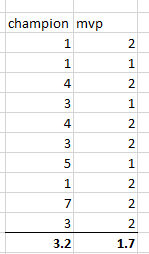

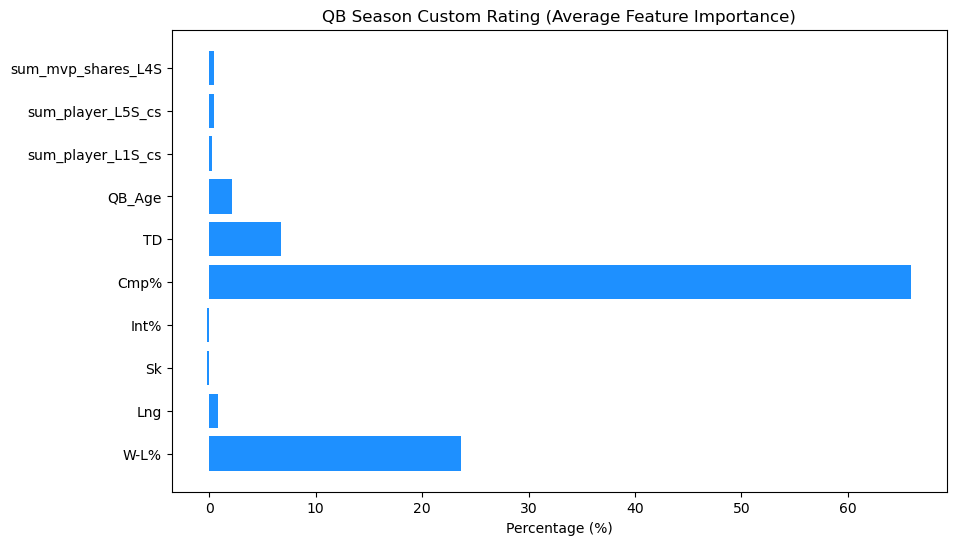

sum_mvp_shares_L4S: 0.41%
sum_player_L5S_cs: 0.46%
sum_player_L1S_cs: 0.23%
QB_Age: 2.12%
TD: 6.73%
Cmp%: 65.99%
Int%: -0.23%
Sk: -0.19%
Lng: 0.83%
W-L%: 23.64%


In [198]:
# Define features, weights, and target variable
features = ['sum_mvp_shares_L4S', 'sum_player_L5S_cs', 'sum_player_L1S_cs', 'QB_Age', 'TD', 'Cmp%', 'Int%', 'Sk', 'Lng', 'W-L%']
weights = [0.76, 0.12, 0.25, 0.01, 0.05, 0.15, -0.01, -0.0009641855158425538, 0.001811828880220935, 6.5]

# Calculate the average of each feature -ja
averages = top_players_passing_data[features].mean()

# Apply weights to each average -ja
weighted_values = averages * weights

# Calculate total weighted sum -ja
total_weighted_sum = weighted_values.sum()

# Calculate percentage of each weighted value relative to the total weighted sum -ja
percentages = (weighted_values / total_weighted_sum) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features, percentages, color='dodgerblue')
plt.xlabel('Percentage (%)')
plt.title('QB Season Custom Rating (Average Feature Importance)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability -ja
plt.show()

# Display the percentage weights for each feature -ja
for feature, percent in zip(features, percentages):
    print(f'{feature}: {percent:.2f}%')

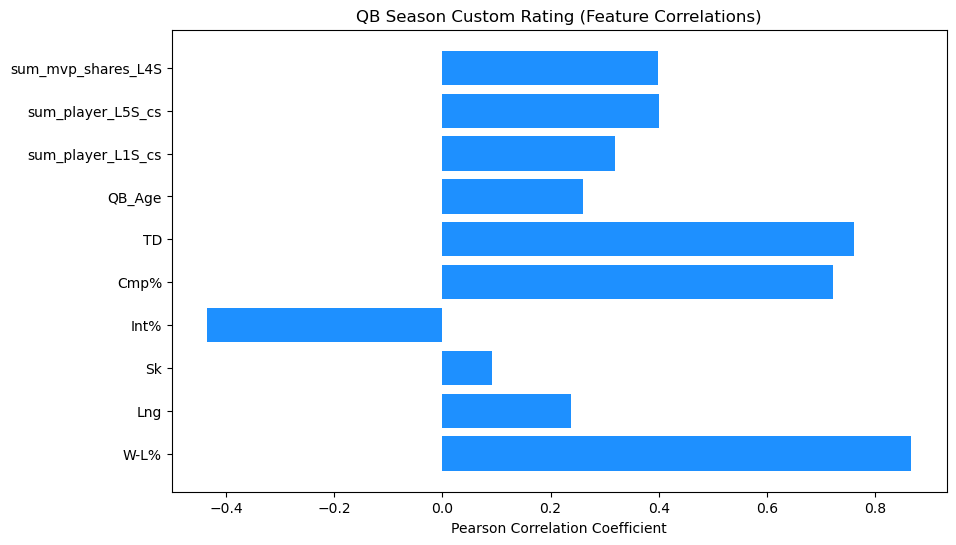

sum_mvp_shares_L4S: Correlation = 0.40, Percentage = 8.86%
sum_player_L5S_cs: Correlation = 0.40, Percentage = 8.94%
sum_player_L1S_cs: Correlation = 0.32, Percentage = 7.09%
QB_Age: Correlation = 0.26, Percentage = 5.77%
TD: Correlation = 0.76, Percentage = 16.95%
Cmp%: Correlation = 0.72, Percentage = 16.06%
Int%: Correlation = -0.44, Percentage = 9.69%
Sk: Correlation = 0.09, Percentage = 2.04%
Lng: Correlation = 0.24, Percentage = 5.29%
W-L%: Correlation = 0.87, Percentage = 19.31%


In [200]:
target_variable = 'QB_sea_rating_custom'
correlations = [top_players_passing_data[feature].corr(top_players_passing_data[target_variable]) for feature in features]

absolute_correlations = np.abs(correlations)

percentages = (absolute_correlations / absolute_correlations.sum()) * 100

plt.figure(figsize=(10, 6))
plt.barh(features, correlations, color='dodgerblue')
plt.xlabel('Pearson Correlation Coefficient')
plt.title('QB Season Custom Rating (Feature Correlations)')
plt.gca().invert_yaxis()
plt.show()

for feature, corr, percent in zip(features, correlations, percentages):
    print(f'{feature}: Correlation = {corr:.2f}, Percentage = {percent:.2f}%')

In [201]:
print(list(top_players_passing_data))

['season', 'Player', 'Tm', 'Pos', 'team_id', 'playoff_games', 'champion', 'champion_share', 'mvp_shares', 'dpoy_shares', 'opoy_shares', 'all_pro', 'cpoy_shares', 'sum_QB_mvp_shares', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_all_pro', 'sum_cpoy_shares', 'sum_champion_shares', 'sum_champions', 'sum_QB_playoff_games', 'sum_mvp_shares_L4S', 'sum_dpoy_shares_L4S', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'G', 'GS', 'QB_Age', 'QBR', 'TD', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'SRS', 'W-L%', 'MoV', 'SoS', 'sum_career_GWD', 'sum_career_4QC', 'sum_career_TD', 'avg_career_GWD', 'avg_career_4QC', 'avg_career_TD', 'QB_sea_rating_custom', 'QBSRC_rk']


In [202]:
top_players_passing_data.to_csv('QB_db.csv', index=False, encoding="utf-8-sig")

### Merging Team Starting QB Features into Team Database

In [203]:

# Step 2: Merge the specified columns from 'all_coaches_data' into 'all_team_advance_data' -ja
all_team_advance_data = all_team_advance_data.merge(
    top_players_passing_data[['team_id', 'season', 'sum_QB_playoff_games', 'QB_Age', 'sum_QB_mvp_shares', 'QBSRC_rk', 'Player']],
    on=['team_id', 'season'],
    how='left'
)

# Rename the 'Player' column to 'quarterback' in the DataFrame 'all_team_advanced_data' -ja
all_team_advance_data.rename(columns={'Player': 'Quarterback'}, inplace=True)

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])
all_team_advance_data

,season,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,...,40_50+_perc_x_makes,Scoring_FG%,Scoring_Lng,Scoring_XP%,break_even_over500_PD,sum_QB_playoff_games,QB_Age,sum_QB_mvp_shares,QBSRC_rk,Quarterback
0,2023,Baltimore Ravens,13,4,0.765,483,280,203,11.9,1.2,...,8.470588,0.865,50.0,0.981,1,6.0,26.0,1.000,2.0,QB Lamar Jackson
1,2023,San Francisco 49ers,12,5,0.706,491,298,193,11.4,0.4,...,4.000000,0.840,57.0,0.984,1,3.0,24.0,0.000,4.0,QB Brock Purdy
2,2023,Dallas Cowboys,12,5,0.706,509,315,194,11.4,-2.2,...,14.000000,0.947,60.0,0.942,0,7.0,30.0,0.020,3.0,QB Dak Prescott
3,2023,Detroit Lions,12,5,0.706,461,395,66,3.9,0.4,...,1.000000,1.000,41.0,0.867,0,7.0,29.0,0.000,5.0,QB Jared Goff
4,2023,Buffalo Bills,11,6,0.647,451,311,140,8.2,-1.8,...,5.333333,0.828,54.0,0.980,1,8.0,27.0,0.382,6.0,QB Josh Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1980,Tampa Bay Buccaneers,5,10,0.344,271,341,-70,-4.4,-0.7,...,0.200000,0.696,43.0,0.969,0,0.0,25.0,0.000,27.0,QB Doug Williams
1333,1980,Green Bay Packers,5,10,0.344,231,371,-140,-8.8,-0.3,...,0.250000,0.500,50.0,0.778,0,0.0,31.0,0.000,21.0,QB Lynn Dickey
1334,1980,St. Louis Cardinals,5,11,0.313,299,350,-51,-3.2,0.8,...,3.125000,0.733,43.0,1.000,0,0.0,36.0,0.000,24.0,QB Jim Hart
1335,1980,New York Giants,4,12,0.250,249,425,-176,-11.0,1.3,...,4.083333,0.667,51.0,0.964,0,0.0,25.0,0.000,28.0,QB Phil Simms


In [204]:
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])
all_team_advance_data['champion_share'] = all_team_advance_data['champion_share'].fillna(0)
all_team_advance_data['champion'] = all_team_advance_data['champion'].fillna(0)

#creating franchise stats-ja
all_team_advance_data = all_team_advance_data.sort_values(by='season', ascending=False)

#function to calculate the rolling sum for the last N seasons excluding the current season-ja
def calculate_rolling_sum(df, column, new_column, window):
    rolling_sums = df.groupby('Team')[column].apply(lambda x: x.shift(1).rolling(window=window, min_periods=1).sum())
    df[new_column] = rolling_sums.reset_index(level=0, drop=True)
    df[new_column] = df[new_column].fillna(0)
    return df

#sort the DataFrame by 'Player' and 'season' in ascending order-ja
all_team_advance_data = all_team_advance_data.sort_values(by=['Team', 'season'])

#calculate the rolling sums-ja
all_team_advance_data = calculate_rolling_sum(all_team_advance_data, 'champion_share', 'sum_franchise_L1S_cs', 1)
all_team_advance_data = calculate_rolling_sum(all_team_advance_data, 'champion_share', 'sum_franchise_L3S_cs', 3)
all_team_advance_data = calculate_rolling_sum(all_team_advance_data, 'champion_share', 'sum_franchise_L5S_cs', 5)
all_team_advance_data = calculate_rolling_sum(all_team_advance_data, 'champion_share', 'sum_franchise_L8S_cs', 8)

#sort the DataFrame back by 'season' in descending order-ja
all_team_advance_data = all_team_advance_data.sort_values(by='season', ascending=False)

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

all_team_advance_data = all_team_advance_data.sort_values(by=['W-L%', 'season'], ascending=[False, False])

all_team_advance_data['champion_share'] = all_team_advance_data['champion_share'].fillna(0)
all_team_advance_data['champion'] = all_team_advance_data['champion'].fillna(0)

#sort the DataFrame by 'Player' and 'season' in descending order-ja
all_team_advance_data = all_team_advance_data.sort_values(by=['season','W-L%'], ascending=[False, False])

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Create 'QB_2_or_more_GWD' column -ja
all_team_advance_data['QB_2_or_more_GWD'] = (all_team_advance_data['passing_offense_GWD'] >= 2).astype(int)

# Create '500_rec_7pt_or_less' column -ja
all_team_advance_data['500_rec_7pt_or_less'] = (all_team_advance_data['rec_7pt_or_less'] >= 0.5).astype(int)

# Create '500_rec_7pt_or_less' column -ja
all_team_advance_data['625_rec'] = (all_team_advance_data['W-L%'] >= 0.625).astype(int)

all_team_advance_data['SRS_greater_than_1.5_pts'] = (all_team_advance_data['SRS'] >= 1.5).astype(int)

In [205]:
all_team_advance_data['champion_share'] = all_team_advance_data['champion_share'].fillna(0)
all_team_advance_data['champion'] = all_team_advance_data['champion'].fillna(0)

# Convert columns to numeric, forcing errors to NaN -ja
all_team_advance_data['40_50+_perc_x_makes'] = pd.to_numeric(all_team_advance_data['40_50+_perc_x_makes'], errors='coerce')
all_team_advance_data['sum_mvp_shares'] = pd.to_numeric(all_team_advance_data['sum_mvp_shares'], errors='coerce')
all_team_advance_data['sum_franchise_L1S_cs'] = pd.to_numeric(all_team_advance_data['sum_franchise_L1S_cs'], errors='coerce')
all_team_advance_data['sum_dpoy_shares'] = pd.to_numeric(all_team_advance_data['sum_dpoy_shares'], errors='coerce')
all_team_advance_data['sum_opoy_shares'] = pd.to_numeric(all_team_advance_data['sum_opoy_shares'], errors='coerce')
all_team_advance_data['Scoring_FG%'] = pd.to_numeric(all_team_advance_data['Scoring_FG%'], errors='coerce')
all_team_advance_data['W'] = pd.to_numeric(all_team_advance_data['W'], errors='coerce')

# Fill NaN values that might have been introduced with 0 -ja
all_team_advance_data = all_team_advance_data.fillna(0)


# Step 3: Perform your operations such as custom rating calculation -ja
all_team_advance_data['team_rating_custom'] = (
    (all_team_advance_data['40_50+_perc_x_makes'] * 0.006666666666664085) +
    (all_team_advance_data['sum_mvp_shares'] * 0.2166666666666664) +
    (all_team_advance_data['sum_franchise_L1S_cs'] * 0.3333333333333346) +
    (all_team_advance_data['sum_dpoy_shares'] * 0.15000000000000088) +
    (all_team_advance_data['sum_opoy_shares'] * 0.049999999999998594) +
    (all_team_advance_data['sum_cpoy_shares'] * 0.2666666666666677) +
    (all_team_advance_data['Scoring_FG%'] * 0.24999999999999487) +
    (all_team_advance_data['W'] * 0.18333333333333468) +
    (all_team_advance_data['625_rec'] * 2.3333333333333357) +
    (all_team_advance_data['SRS_greater_than_1.5_pts'] * 2.3333333333333357) + 
    (all_team_advance_data['sum_playoff_games'] * 0.00011666666666662269)
)

all_team_advance_data = all_team_advance_data.sort_values(by=['season','W-L%'], ascending=[False, False])

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Filter and display the DataFrame -ja
filtered_df = all_team_advance_data[(all_team_advance_data['season'] == 2023) & (all_team_advance_data['make_playoffs'] == 1)][['season','Team', 'champion_share', 'team_rating_custom','40_50+_perc_x_makes', 'sum_mvp_shares', 
                                                                                                                                'sum_franchise_L1S_cs', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_cpoy_shares','Scoring_FG%', 'W', '625_rec', 
                                                                                                                                'SRS_greater_than_1.5_pts', 'sum_playoff_games']].sort_values(by='team_rating_custom', ascending=False)
filtered_df

,season,Team,champion_share,team_rating_custom,40_50+_perc_x_makes,sum_mvp_shares,sum_franchise_L1S_cs,sum_dpoy_shares,sum_opoy_shares,sum_cpoy_shares,Scoring_FG%,W,625_rec,SRS_greater_than_1.5_pts,sum_playoff_games
7,2023,Kansas City Chiefs,1.00,7.866217,12.000000,1.840,1.00,0.224,1.160,0.004,0.943,11,1,1,364.0
1,2023,San Francisco 49ers,0.75,7.584367,4.000000,0.040,0.50,0.948,0.284,0.440,0.840,12,1,1,274.0
0,2023,Baltimore Ravens,0.50,7.576237,8.470588,1.000,0.00,0.000,0.340,0.004,0.865,13,1,1,161.0
2,2023,Dallas Cowboys,0.00,7.557200,14.000000,0.024,0.25,0.944,0.000,0.420,0.947,12,1,1,157.0
4,2023,Buffalo Bills,0.25,7.195339,5.333333,0.382,0.25,0.420,0.088,0.004,0.828,11,1,1,299.0
3,2023,Detroit Lions,0.50,7.154933,1.000000,0.000,0.00,0.000,0.000,0.080,1.000,12,1,1,88.0
6,2023,Cleveland Browns,0.00,7.044024,15.428571,0.000,0.00,0.068,0.000,0.016,0.917,11,1,1,121.0
5,2023,Miami Dolphins,0.00,6.983361,8.066667,0.004,0.00,0.060,0.172,0.000,0.857,11,1,1,116.0
8,2023,Philadelphia Eagles,0.00,5.078578,13.066667,0.388,0.75,0.076,0.264,0.084,0.938,11,1,0,222.0
11,2023,Los Angeles Rams,0.00,4.989552,1.777778,0.060,0.00,2.890,0.700,0.460,0.750,10,0,1,166.0


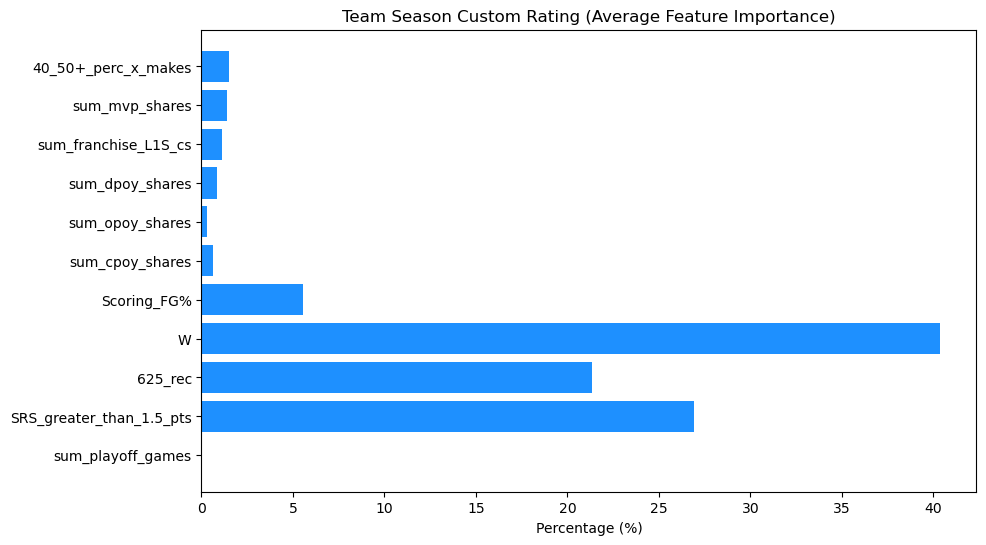

40_50+_perc_x_makes: 1.51%
sum_mvp_shares: 1.42%
sum_franchise_L1S_cs: 1.12%
sum_dpoy_shares: 0.87%
sum_opoy_shares: 0.29%
sum_cpoy_shares: 0.61%
Scoring_FG%: 5.54%
W: 40.34%
625_rec: 21.37%
SRS_greater_than_1.5_pts: 26.93%
sum_playoff_games: 0.00%


In [206]:
# Defining features and weights -ja
features = [
    '40_50+_perc_x_makes',
    'sum_mvp_shares',
    'sum_franchise_L1S_cs',
    'sum_dpoy_shares',
    'sum_opoy_shares',
    'sum_cpoy_shares',
    'Scoring_FG%',
    'W',
    '625_rec',
    'SRS_greater_than_1.5_pts',
    'sum_playoff_games'
]

weights = [
    0.01,
    0.22,
    0.33,
    0.15,
    0.05,
    0.27,
    0.25,
    0.18,
    2.33,
    2.33,
    0.00
]

# mean on those x top rows - ja
averages = all_team_advance_data[features].mean()

# Apply weights to each average -ja
weighted_values = averages * weights

# Calculate total weighted sum -ja
total_weighted_sum = weighted_values.sum()

# Calculate percentage of each weighted value relative to the total weighted sum -ja
percentages = (weighted_values / total_weighted_sum) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features, percentages, color='dodgerblue')
plt.xlabel('Percentage (%)')
plt.title('Team Season Custom Rating (Average Feature Importance)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability -ja
plt.show()

# Display the percentage weights for each feature -ja
for feature, percent in zip(features, percentages):
    print(f'{feature}: {percent:.2f}%')

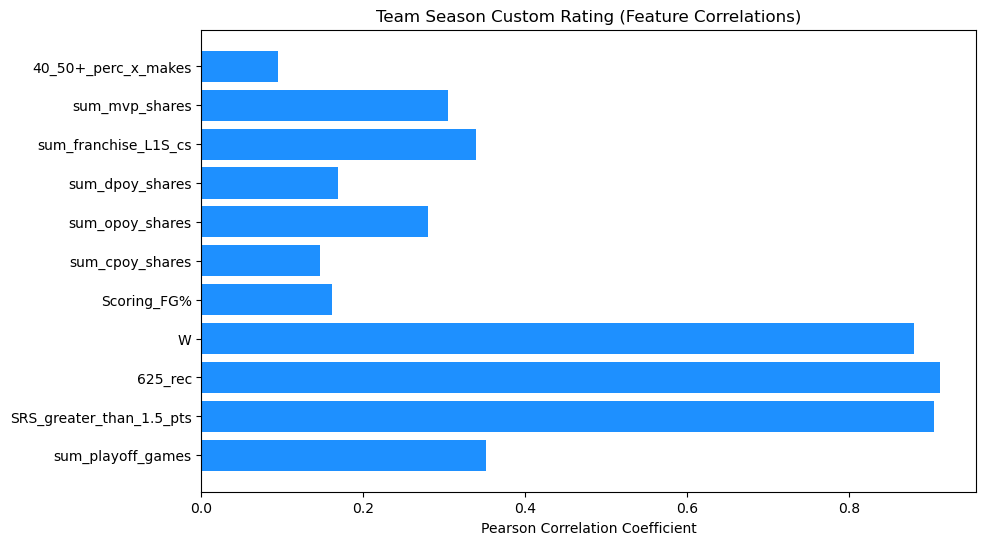

40_50+_perc_x_makes: Correlation = 0.09, Percentage = 2.09%
sum_mvp_shares: Correlation = 0.30, Percentage = 6.71%
sum_franchise_L1S_cs: Correlation = 0.34, Percentage = 7.45%
sum_dpoy_shares: Correlation = 0.17, Percentage = 3.71%
sum_opoy_shares: Correlation = 0.28, Percentage = 6.15%
sum_cpoy_shares: Correlation = 0.15, Percentage = 3.23%
Scoring_FG%: Correlation = 0.16, Percentage = 3.56%
W: Correlation = 0.88, Percentage = 19.37%
625_rec: Correlation = 0.91, Percentage = 20.08%
SRS_greater_than_1.5_pts: Correlation = 0.90, Percentage = 19.92%
sum_playoff_games: Correlation = 0.35, Percentage = 7.73%


In [207]:
target_variable = 'team_rating_custom'
correlations = [all_team_advance_data[feature].corr(all_team_advance_data[target_variable]) for feature in features]

absolute_correlations = np.abs(correlations)

percentages = (absolute_correlations / absolute_correlations.sum()) * 100

plt.figure(figsize=(10, 6))
plt.barh(features, correlations, color='dodgerblue')
plt.xlabel('Pearson Correlation Coefficient')
plt.title('Team Season Custom Rating (Feature Correlations)')
plt.gca().invert_yaxis()
plt.show()

for feature, corr, percent in zip(features, correlations, percentages):
    print(f'{feature}: Correlation = {corr:.2f}, Percentage = {percent:.2f}%')

### Export & Adding in Some Ranking Features

In [ ]:
# Add +1 to all values in the 'season' column -ja
all_team_advance_data['season'] = all_team_advance_data['season'] + 1

In [ ]:
#7 seed feature -ja
all_team_advance_data['7_seed'] = all_team_advance_data['seed'].apply(lambda x: 1 if x == 7 else 0)

In [ ]:
#list of columns in the desired order-ja
desired_order = [
    'season', 'Team', 'team_id', 'Quarterback', 'conference', 'divisions', 'round','champion_share',
    'champion'
]

#append the remaining columns to the desired order-ja
remaining_columns = [col for col in all_team_advance_data.columns if col not in desired_order]
final_order = desired_order + remaining_columns

#reorder the DataFrame-ja
all_team_advance_data = all_team_advance_data[final_order]

all_team_advance_data = all_team_advance_data.sort_values(by=['season', 'team_rating_custom'], ascending=[False, False])

all_team_advance_data.to_csv('NFL Champion RawData.csv', index=False, encoding="utf-8-sig")
print(list(all_team_advance_data))

['season', 'Team', 'team_id', 'Quarterback', 'conference', 'divisions', 'round', 'champion_share', 'champion', 'W', 'L', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS', 'DSRS', 'make_playoffs', 'seed', '1_seed', '2_seed', '3_seed', '4_seed', '5_seed', '6_seed', 'playoff_games', 'playoff_wins', 'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot Yds & TO_Cmp', 'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 'team_offense_Passing_1stD', 'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD', 'team_offense_Penalties_Pen', 'team_offense_Penalties_Yds', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 'team_offense_TO%', 'te

In [ ]:
df = pd.read_csv("NFL Champion RawData.csv")
df = df.fillna(0)

exclude_columns = ['season','Team', 'team_id','Quarterback', 'QBSRC_rk','conference', 'divisions', 'round','champion', 'champion_share', 'seed', '1_seed', '2_seed', '3_seed', '4_seed', '5_seed', '6_seed', '7_seed', 'playoff_games', 'playoff_wins', '500_rec_7pt_or_less','QB_2_or_more_GWD''625_rec', 'SRS_greater_than_1.5_pts']

reverse_rank_columns = ['pso']

for col in df.columns:
    if col not in exclude_columns:
        if col in reverse_rank_columns:
            df[col] = df.groupby('season')[col].rank(method='min', ascending=True)
        else:
            df[col] = df.groupby('season')[col].rank(method='min', ascending=False)
            
df = df.sort_values(by=['season', 'W-L%'], ascending=[False, True])

df.to_csv("NFL Champion LR Data.csv",index=False, encoding="utf-8-sig")
print(list(df))

['season', 'Team', 'team_id', 'Quarterback', 'conference', 'divisions', 'round', 'champion_share', 'champion', 'W', 'L', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS', 'DSRS', 'make_playoffs', 'seed', '1_seed', '2_seed', '3_seed', '4_seed', '5_seed', '6_seed', 'playoff_games', 'playoff_wins', 'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot Yds & TO_Cmp', 'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 'team_offense_Passing_1stD', 'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD', 'team_offense_Penalties_Pen', 'team_offense_Penalties_Yds', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 'team_offense_TO%', 'te

In [ ]:

columns_to_merge = {
    'team_rating_custom': 'rank_team_rating_custom',
}
df_to_merge = df[['season', 'team_id'] + list(columns_to_merge.keys())].rename(columns=columns_to_merge)


all_team_advance_data = pd.merge(
    all_team_advance_data,
    df_to_merge,
    on=['team_id', 'season'],
    how='left'
)

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

all_team_advance_data['top_5_team_rating_custom'] = all_team_advance_data['rank_team_rating_custom'].apply(lambda x: 1 if x <= 5 else 0)
all_team_advance_data['top_7_QBSRC'] = all_team_advance_data['QBSRC_rk'].apply(lambda x: 1 if x <= 7 else 0)

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

all_team_advance_data = all_team_advance_data.sort_values(by=['season', 'W-L%', 'team_rating_custom'], ascending=[False, False, False])

all_team_advance_data.to_csv('NFL Champion RawData.csv', index=False, encoding="utf-8-sig")